In [17]:
#!/usr/bin/env python3
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statistics
import sys
import statistics

In [41]:
#!/usr/bin/env python3

# Create a script to evaluate quality of vcf file produced by our fastq -> vcf pipeline
# Generate the numbers required to create histograms for read depth and allelic balance from a single VCF
# Generate two lists (variant allele frequencies and variant read depth) for unfiltered VCF, then filter and generate the two lists again for each of the following parameters:
# Will create 10 lists total.

# Filtering parameters:
# 1) GQ >= 30
# 2) AD1 >= 3 AND AD2 >=3
# 3) DP <= 100
# 4) GQ >= 30 AND AD1 >= 3 AND AD2 >=3 AND DP <= 100

import sys
import statistics

fh = open('/data/project/case-6-control-tumor-merged-filtered.vcf', "r")

AFs10_list = [] # list for tumor VAFs
AFs11_list = [] # list for control VAFs

for line in fh:
    if not line.startswith('#'):
        line = line.rstrip()
        values = line.split("\t")
        
        field10 = values[9]
        field11 = values[10]

        elements_in_field10 = field10.split(":")
        elements_in_field11 = field11.split(":")
        
        if len(elements_in_field10) == 5 and len(elements_in_field11) == 5:
            #print(field10,field11)
            #break
            field10_elements = field10.split(':')
            field11_elements = field11.split(':')

            AD10_elements = field10_elements[3].split(',')
            AD11_elements = field11_elements[3].split(',')

            if len(AD10_elements) == 2 and len(AD11_elements) == 2:
                #print("field10='{0}' field11='{1}' AD10='{2}' AD11='{3}'".format(field10, field11, AD10, AD11))
                AD10_1, AD10_2 = [int(x) for x in AD10_elements]
                AD11_1, AD11_2 = [int(x) for x in AD11_elements]
                variant_AF_10 = (AD10_2/(AD10_1 + AD10_2))
                variant_AF_11 = (AD11_2/(AD11_1 + AD11_2))
                AFs10_list.append(variant_AF_10)
                AFs11_list.append(variant_AF_11)
                
            
print(AFs10_list)
print(AFs11_list)

[0.2857142857142857, 0.2903225806451613, 0.21052631578947367, 0.5384615384615384, 0.5, 0.4, 0.39622641509433965, 0.5714285714285714, 0.6666666666666666, 0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.26666666666666666, 0.42857142857142855, 0.45454545454545453, 0.2222222222222222, 0.2727272727272727, 0.35714285714285715, 0.41025641025641024, 0.4375, 0.45, 0.5384615384615384, 0.42105263157894735, 0.5, 0.38461538461538464, 0.5555555555555556, 0.3333333333333333, 0.6, 0.32, 0.5625, 0.25, 0.3333333333333333, 0.3333333333333333, 0.45454545454545453, 0.42105263157894735, 0.2916666666666667, 0.5555555555555556, 0.2857142857142857, 0.391304347826087, 0.35714285714285715, 0.25, 0.45454545454545453, 0.2692307692307692, 0.4444444444444444, 0.4666666666666667, 0.5714285714285714, 0.3125, 0.35, 0.375, 0.5789473684210527, 0.5714285714285714, 0.19607843137254902, 0.4583333333333333, 0.5789473684210527, 0.6956521739130435, 0.34615384615384615, 0.36904761904761907, 0.47619047619047616, 0.3, 0.3333

# Plotting variant allele balance in Case 6: Tumor vs Control

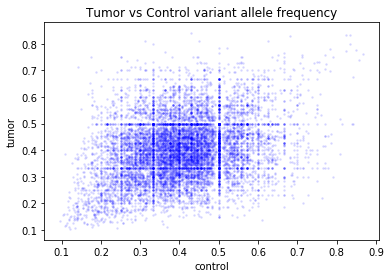

In [67]:
x = AFs11_list # control
y = AFs10_list # tumor

plt.title('Tumor vs Control variant allele frequency')
plt.xlabel('control')
plt.ylabel('tumor')
plt.scatter(x,y, s=10, c='blue', marker='.', alpha=0.1)
plt.show()